# Car Features Data Analysis

 The owner of a car showroom handles a variety of car types and models. This dataset
 includes a range of features for each car, corresponding to the models present in the
 showroom. The price of each car is determined by its unique attributes. Our objective is to
 examine these various car features and understand how they influence the car's pricing.

### Perform EDA on the given dataset.

Import Important Libraries for Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import factorial
from scipy.stats import binom

Read the CSV File

In [2]:
car = pd.read_csv('CarFeatures (1).csv')

In [3]:
car.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


In [4]:
#checking null values
print("Missing values in each column:\n", car.isnull().sum())

Missing values in each column:
 Make                   0
Fuel Type              0
Aspiration             0
Number of Doors        0
Body Style             0
Drive Wheels           0
Engine Location        0
Number of Cylinders    0
Wheel Base             0
Length                 0
Width                  0
Height                 0
Curb Weight            0
Engine Size            0
Horsepower             0
City MPG               0
Highway MPG            0
Price                  0
dtype: int64


In [5]:
#Shape of the dataset (rows, columns)
print("Shape of the dataset:", car.shape)

Shape of the dataset: (25, 18)


1. .Summarize the data using descriptive statistics

In [6]:
descriptive_stats= car.describe()
descriptive_stats

,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,105.736000,173.928000,65.868000,52.680000,2907.720000,192.360000,168.760000,29.720000,37.640000,22684.920000
std,9.046403,18.508523,3.632804,3.623534,777.650924,79.342548,73.189981,10.659581,10.664896,10684.205266
min,91.700000,143.400000,60.500000,47.800000,1488.000000,79.000000,50.000000,13.000000,16.000000,5272.000000
25%,96.000000,161.400000,62.500000,50.000000,2108.000000,106.000000,100.000000,24.000000,30.000000,14838.000000
50%,106.800000,172.400000,66.300000,51.800000,3231.000000,199.000000,168.000000,29.000000,41.000000,18524.000000
75%,113.900000,187.800000,68.500000,55.100000,3433.000000,252.000000,231.000000,38.000000,45.000000,31393.000000
max,119.600000,207.600000,71.500000,59.800000,3922.000000,319.000000,288.000000,49.000000,53.000000,40466.000000


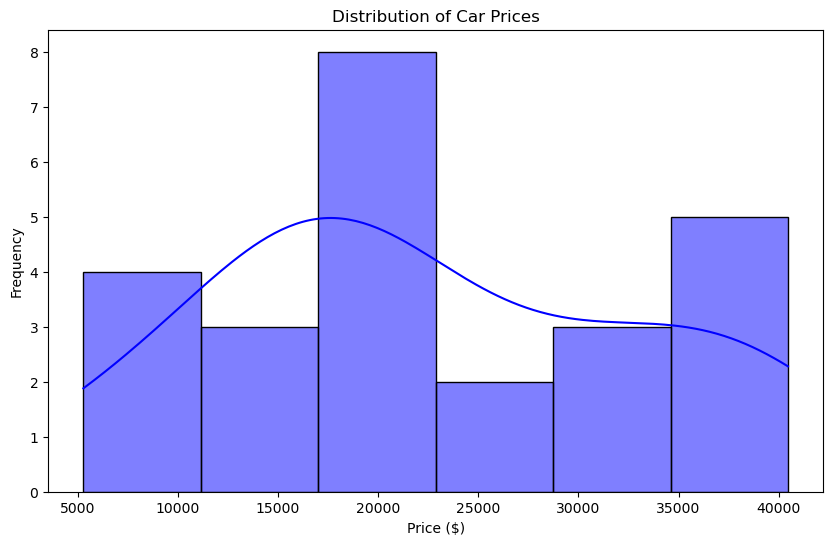

In [7]:
# Univariate Analysis: Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(car['Price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

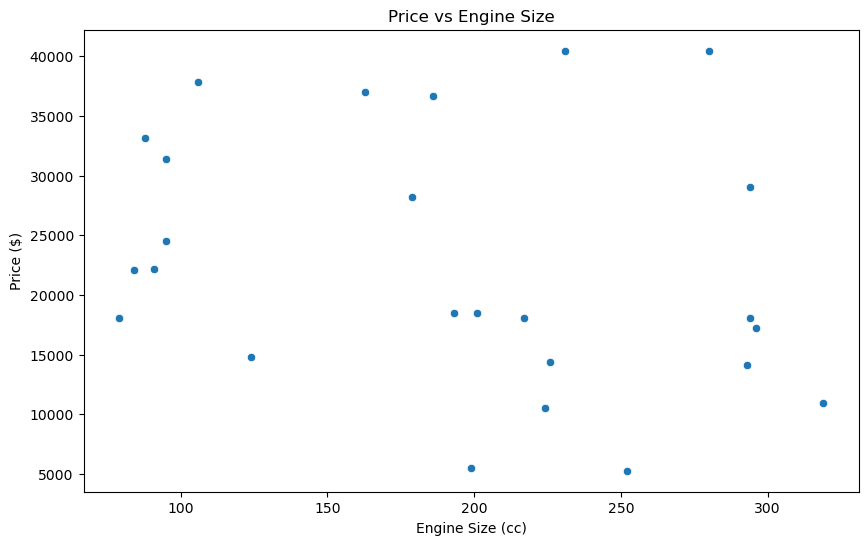

In [8]:
#Bivariate Analysis: Relationship between Price and Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size', y='Price', data=car)
plt.title('Price vs Engine Size')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Price ($)')
plt.show()

2. Identify the costliest car and the cheapest car by average price.

In [9]:
# Costliest and Cheapest Car by Average Price (Grouped by Make)
grouped_car_avg_price = car.groupby('Make')['Price'].mean().reset_index()
grouped_car_avg_price

,Make,Price
0,Audi,27944.333333
1,BMW,20076.750000
2,Chevrolet,40450.000000
3,Ford,8246.500000
4,Honda,14109.000000
5,Mazda,18685.666667
6,Mercedes,22832.000000
7,Mitsubishi,30456.666667
8,Nissan,14838.000000
9,Toyota,25292.500000


In [10]:
#Costliet Car
costliest_car = grouped_car_avg_price.loc[grouped_car_avg_price['Price'].idxmax()]
print("Costliest Car:\n", costliest_car)

Costliest Car:
 Make     Chevrolet
Price      40450.0
Name: 2, dtype: object


In [11]:
#Cheapest Car
cheapest_car = grouped_car_avg_price.loc[grouped_car_avg_price['Price'].idxmin()]
print("Cheapest Car:\n", cheapest_car)

Cheapest Car:
 Make       Ford
Price    8246.5
Name: 3, dtype: object


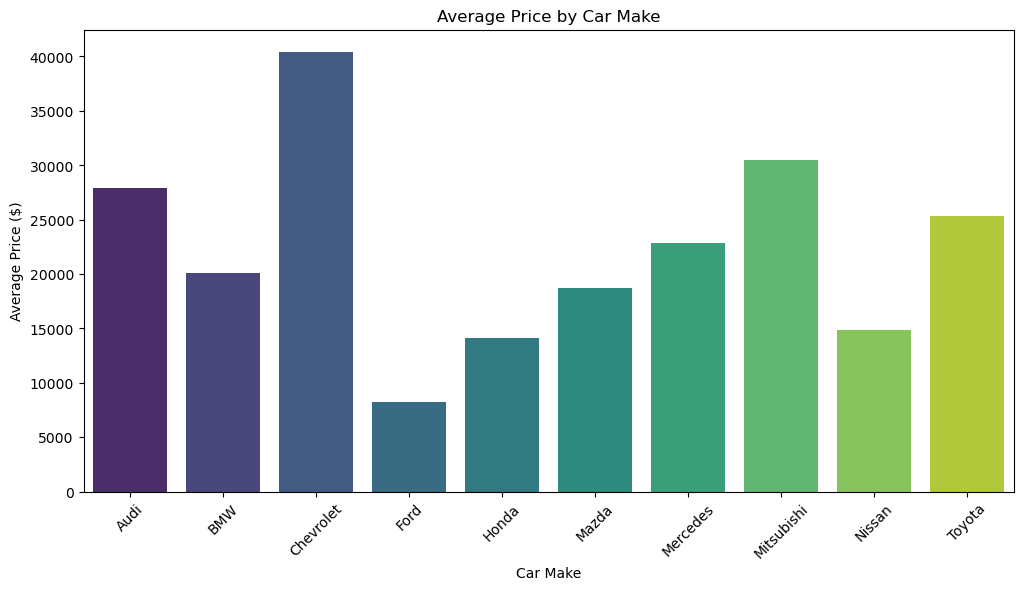

In [12]:
# Plot average price by car make
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Price', data=grouped_car_avg_price, palette='viridis')
plt.title('Average Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

3. Which fuel type car has the highest average price?

In [13]:
#Which Fuel Type Has the Highest Average Price?
grouped_fuel_type_avg_price = car.groupby('Fuel Type')['Price'].mean().reset_index()
print("Average Price by Fuel Type:\n", grouped_fuel_type_avg_price)

Average Price by Fuel Type:
   Fuel Type         Price
0    Diesel  20199.416667
1       Gas  24979.230769


In [14]:
# Fuel Type with the Highest Average Price
highest_avg_fuel_type = grouped_fuel_type_avg_price.loc[grouped_fuel_type_avg_price['Price'].idxmax()]
print("Fuel Type with the Highest Average Price:\n", highest_avg_fuel_type)

Fuel Type with the Highest Average Price:
 Fuel Type             Gas
Price        24979.230769
Name: 1, dtype: object


4. For the given dataset, construct the following contingency table (take “make” as row
 variable)

In [15]:
# Contingency Table for Car Make and Fuel Type
contingency_table = pd.crosstab(car['Make'], car['Fuel Type'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
 Fuel Type   Diesel  Gas
Make                   
Audi             2    1
BMW              4    0
Chevrolet        0    1
Ford             0    2
Honda            0    1
Mazda            2    1
Mercedes         1    2
Mitsubishi       1    2
Nissan           0    1
Toyota           2    2


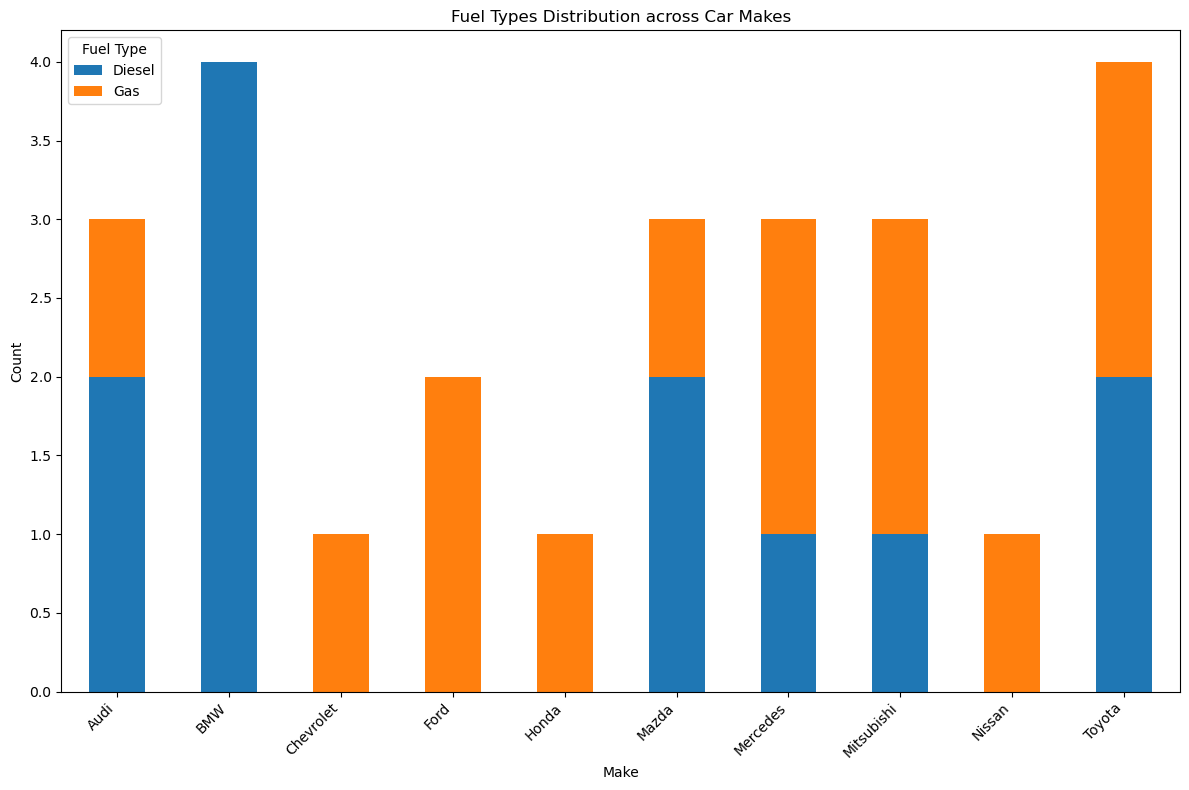

In [16]:
# Plotting Contingency Table
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Fuel Types Distribution across Car Makes')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. What is the probability that a randomly selected car will be a BMW?

In [17]:
#Total no. of cars
total_cars = car.shape[0]

In [18]:
#Filter the total no. of BMW cars
bmw_cars = car[car['Make'] == 'BMW'].shape[0]

In [19]:
# Probability of randomly selecting a BMW
probability_bmw = bmw_cars / total_cars
print("Probability of randomly selecting a BMW:", probability_bmw)

Probability of randomly selecting a BMW: 0.16


6. What is the probability that a randomly selected car will be an Audi?

In [20]:
#Filter the total no. of AUDI cars
audi_cars = car[car['Make'] == 'Audi'].shape[0]

In [21]:
# Probability of randomly selecting a AUDI
probability_audi = audi_cars / total_cars
print("Probability of randomly selecting an Audi:", probability_audi)

Probability of randomly selecting an Audi: 0.12


7. Form the null and alternate hypothesis to test whether the price of Gas cars is significantly different from that of Diesel Cars

Hypothesis Testing for Gas vs. Diesel Cars

In [22]:
# Hypothesis Testing: Gas vs. Diesel Car Prices
gas_prices = car[car['Fuel Type'] == 'Gas']['Price']
diesel_prices = car[car['Fuel Type'] == 'Diesel']['Price']

In [23]:
# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(gas_prices, diesel_prices)

In [24]:
print("Null Hypothesis (H0): The mean price of gas cars is equal to the mean price of diesel cars.")
print("Alternative Hypothesis (H1): The mean price of gas cars is different from the mean price of diesel cars.")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


Null Hypothesis (H0): The mean price of gas cars is equal to the mean price of diesel cars.
Alternative Hypothesis (H1): The mean price of gas cars is different from the mean price of diesel cars.

t-statistic: 1.1236
p-value: 0.2728


8.  Form the null and alternate hypothesis and find the p-value.At 0.05 level of significance, is the price of gas cars significantly different from that of diesel cars?

In [25]:
# Set the significance level
alpha = 0.05

# Determine statistical significance
if p_value < alpha:
    print(f"At the {alpha} level of significance, we reject the null hypothesis.")
    print("The price of gas cars is significantly different from diesel cars.")
else:
    print(f"At the {alpha} level of significance, we fail to reject the null hypothesis.")
    print("The price of gas cars is not significantly different from diesel cars.")

At the 0.05 level of significance, we fail to reject the null hypothesis.
The price of gas cars is not significantly different from diesel cars.


9. . Suppose you randomly select a car from this dataset. What is the probability that it is a 'Luxury Car' ?
 ( consider BMW, Mercedes and Audi as a luxary car under the column Make )

In [26]:
#List of Luxury car brands
luxury_brands = ['BMW', 'Mercedes', 'Audi']

In [27]:
#Filter the total no. of luxury cars
luxury_cars = car[car['Make'].isin(luxury_brands)].shape[0]

In [28]:
# Probability of randomly selecting a Luxury cars
probability_luxury_car = luxury_cars / total_cars
print("Probability of randomly selecting a luxury car:", probability_luxury_car)

Probability of randomly selecting a luxury car: 0.4


10. You want to select a subset of three unique cars from the dataset to participate in a race. How many different ways can you arrange the cars in the race, considering their 'Make' as the criteria?


 Number of Ways to Arrange Three Unique Cars

In [29]:
# Extract unique makes
unique_makes = car['Make'].unique()
n = len(unique_makes)
k = 3

In [30]:
# Calculate permutations according the formula " p(n,k) = n! / (n-k!) "
permutation = factorial(n) // factorial(n - k)
print(f"The number of different ways to arrange three unique cars is {permutation}")

The number of different ways to arrange three unique cars is 720


11. If you randomly pick a car with 8 cylinders, what is the probability that BMW?

In [31]:
#Filter and total number of car with "Eight" cylinders
eight_cylinder_cars = car[car['Number of Cylinders'] == 'Eight']
total_eight_cylinder_car = eight_cylinder_cars.shape[0]

In [32]:
#filter and total number of BMW car with "Eight" cylinder
eight_cylinder_BMW = eight_cylinder_cars[eight_cylinder_cars['Make'] == 'BMW'].shape[0]

In [33]:
#Calculate the probability
probability_eight_cylinder_BMW = eight_cylinder_BMW / total_eight_cylinder_car
print(f"Probability that an 8-cylinder car is a BMW: {probability_eight_cylinder_BMW}")

Probability that an 8-cylinder car is a BMW: 0.4


12. You are conducting a random survey by selecting 7 cars from the dataset. Calculate the probability that exactly 3 out of the 7 selected cars have 'Turbo' aspiration.

In [34]:
# Probability of Selecting Exactly 3 'Turbo' Cars out of 7 (Binomial Distribution)
turbo_cars = car[car['Aspiration'] == 'Turbo'].shape[0]
p_turbo = turbo_cars / total_cars

In [35]:
n = 7  # number of cars selected
k = 3  # number of Turbo cars desired
probability = binom.pmf(k, n, p_turbo)

In [36]:
print(f"Probability of selecting exactly 3 Turbo cars out of 7: {probability:.4f}")

Probability of selecting exactly 3 Turbo cars out of 7: 0.2932


# Key Insights from Car Features Data Analysis

### 1. Price Distribution:
   - The dataset reveals a significant variation in car prices, with the most expensive car being a **Chevrolet** priced at **40,450**, and the least expensive car being a **Ford** priced at **8,246.50**.
   - The price distribution also highlights the impact of **fuel type** on pricing, which varies across car makes.

### 2. Impact of Fuel Type on Car Pricing:
   - **Gas-powered cars** exhibit a higher average price (**24,979.23**) compared to **diesel-powered cars** (**20,199.42**).
   - However, a statistical test (t-test) indicates that the price difference between gas and diesel cars is **not statistically significant** (t-statistic: 1.1236, p-value: 0.2728). Therefore, there is no substantial evidence that fuel type alone significantly impacts car pricing.

### 3. Brand-Specific Insights:
   - **BMW**, **Mercedes**, and **Audi** dominate the luxury segment, with **40%** of the cars in the dataset classified as luxury vehicles.
   - **BMW** cars account for **16%** of the dataset, while **Audi** cars make up **12%**. These brands represent a key portion of the inventory, positioning them as primary drivers of the showroom's premium market.

### 4. Car Features and Probabilities:
   - The probability of a randomly selected car being a **BMW** is **16%**, and for **Audi**, it is **12%**.
   - The probability of selecting a **BMW** with an 8-cylinder engine is **40%**, indicating BMW’s tendency to manufacture higher-powered vehicles.
   - The probability of selecting exactly **three cars with turbo aspiration** out of a group of seven is **29.32%**, showing that turbocharged engines are relatively common among the cars analyzed.

### 5. Contingency Analysis of Make and Fuel Type:
   - The contingency table demonstrates the variation in fuel types across different car makes:
     - **BMW** models are exclusively diesel-powered.
     - Other brands, such as **Audi**, **Mercedes**, and **Ford**, offer both **diesel** and **gas** variants, reflecting a more diversified fuel type offering.

### 6. Combinatorial Arrangement of Cars:
   - The dataset includes **720 different ways** to arrange three unique cars based on their make, demonstrating the wide variety of combinations possible from the car makes available.

---

### Conclusion:
The analysis highlights several key insights:
- Although **gas-powered** cars generally have higher average prices, the lack of statistical significance suggests that **fuel type** alone does not substantially impact pricing.
- **Luxury brands** such as **BMW**, **Mercedes**, and **Audi** play a pivotal role in the premium market, contributing to **40%** of the overall inventory.
- Insights into probabilities, such as the likelihood of selecting **BMWs** with specific features, provide valuable information for inventory management.
These findings can be leveraged by the car dealership to optimize its **inventory strategy**, **pricing models**, and to align better with customer preferences.


Name- Aman Choudhary

Email address- amanchoudhary11189.ac@gmail.com

linkedin Profile- https://www.linkedin.com/in/aman-choudhary-61a9361a0/

Portfolio- https://amanchoudhary1997.github.io/amanchoudhary.github.io/